In [2]:
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import math
from random import random
from random import seed
from random import randint
import time

In [39]:
#display the plot
def isingplot(A):
    im = Image.fromarray(A)
    plt.gray()
    plt.pause(0.001)   
    plt.imshow(A)
    

                  
def Laplacian(A):
    h = len(A)
    #CFL condition delta x => sqrt(D) delta t, where D is the number of dimensions
    deltax = 1
    deltat = 0.1              
    P = np.zeros((h,h))
    result = np.zeros((h,h))
    
    for i in range(0, h):
        for j in range(0,h):
            xx = (-A[(i+2)%h,j] + 16*A[(i+1)%h,j] - 30*A[i,j] + 16*A[(i-1)%h,j] -A[(i-2)%h,j])/(12*pow(deltax,2))
            yy = (-A[i,(j+2)%h] + 16*A[i,(j+1)%h] - 30*A[i,j] + 16*A[i,(j-1)%h] -A[i,(j-2)%h])/(12*pow(deltax,2))
            P[i,j] = xx + yy     
    return P   

def div_potential(A,omega,eta):
    #omega = 15
    lam = 2*pow(math.pi,2)/pow(omega,2)
    pot = lam*A*(pow(A,2)-pow(eta,2))
    return pot
    
def function(A,omega,eta):
    F = np.subtract(Laplacian(A),div_potential(A,omega,eta))
    return F

def update(N,A,vel,omega,eta):
    F = function(A,omega,eta)
    A = A + deltat*(vel + 0.5*deltat*function(A,omega,eta)) 
    vel = vel + deltat/2*(F + function(A,omega,eta))
    return A,vel
    
#change the values accordlingly    
def wolff(N,t,A,vel,omega,eta):
    
    for i in np.arange(t/deltat):
        
        A,vel = update(N,A,vel,omega,eta)
        #if i % pow(2,n-3) == 0:
            #isingplot(A)
    return A


<Figure size 432x288 with 0 Axes>

[[-3.76342865  2.29871869  2.34856348 ... -3.19268334 -1.88832019
  -3.23547126]
 [-3.09509169 -2.07175691  3.21246455 ... -2.79262838 -3.06226016
  -3.18318145]
 [-1.08103432  0.98718297  4.1634448  ...  1.0533316  -4.28552301
  -3.40142383]
 ...
 [ 0.50568155 -2.90739107  1.68111418 ... -4.65366052 -2.06964816
   0.40117888]
 [-1.07912477 -2.71941642  2.52591356 ... -3.28443183 -3.28486531
  -3.17838465]
 [-3.24536995  0.23987255  3.39277981 ... -3.40146466 -2.21302587
  -3.03241514]]


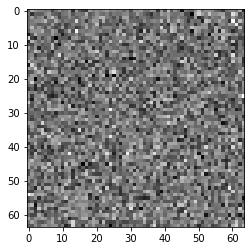

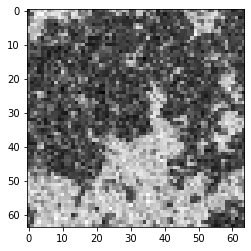

In [46]:
n = 6
deltax = 1
deltat = 0.1
eta = 3
N = pow(2,n)
t = 0.5*N*deltax/deltat
vel = np.zeros((N,N))
mu, sigma = 0, 0.1 # mean and standard deviation
omega = 5
for e in range(0,1):
    A = np.random.normal(mu, sigma, size=(N, N))
    isingplot(A)
    A = wolff(N,t,A,vel,omega,eta)
    print(A)
    isingplot(A)
    

    



<Figure size 432x288 with 0 Axes>

[[-4.10992808 -3.78863046 -2.80979847 ... -2.89362119 -2.60033625
  -3.00648171]
 [-4.24858655 -3.28241662 -2.8694728  ... -3.27675145 -2.71497081
  -3.58084762]
 [-3.8160186  -2.44623742 -1.18638004 ... -2.09188536 -2.7562497
  -3.48371794]
 ...
 [-4.45649432 -3.3776837  -2.4474549  ... -4.8633309  -4.52701669
  -4.17437511]
 [-3.57605506 -2.50233354 -2.10703489 ... -4.47795624 -4.83311957
  -4.06717588]
 [-3.25832137 -2.45518025 -2.45226564 ... -3.14348075 -3.81263523
  -3.01230358]]


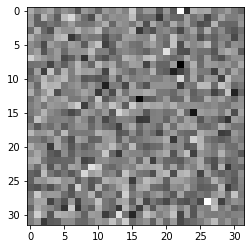

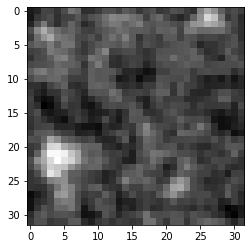

[[-1.42910977 -2.38665754 -1.9299589  ... -0.74605966 -1.63116864
  -2.13564532]
 [-2.5349661  -2.41509404 -2.74511087 ... -2.73336185 -3.14968336
  -3.51157657]
 [-3.24689314 -3.29230925 -3.12928558 ... -2.52453455 -2.29436837
  -2.99290696]
 ...
 [ 2.58432361  2.27637963  2.14578688 ...  1.97456676  1.84446618
   1.85718329]
 [ 1.00511995  1.28522899  1.83533345 ...  1.47080664  1.63064109
   1.0945835 ]
 [-0.85737222 -0.65451075  0.44396271 ...  0.86970708  0.76346901
  -0.3600391 ]]


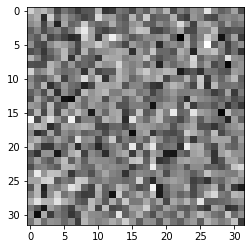

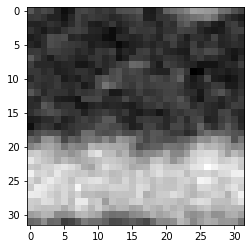

[[-3.66201201 -3.68643605 -3.522916   ... -2.60571136 -3.32428767
  -2.88950039]
 [-3.1244554  -2.75985305 -2.60092714 ... -2.92602595 -2.91343477
  -2.72126741]
 [-3.04565113 -3.2034357  -3.07954101 ... -3.39309516 -3.28450181
  -3.22361416]
 ...
 [-2.9360765  -2.96277144 -2.41464637 ... -1.09944525 -2.26324398
  -3.25357025]
 [-2.75049681 -2.30402883 -2.31737147 ... -1.60086684 -2.38263249
  -2.98155845]
 [-3.25477704 -3.14226849 -2.65099706 ... -1.99932459 -3.30087792
  -3.09983237]]


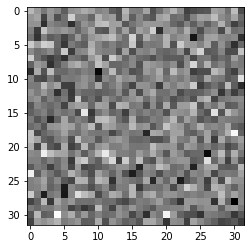

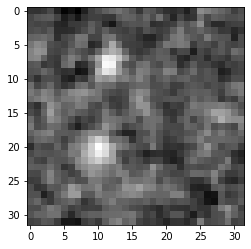

[[ 1.23480234  0.28437054  1.23214308 ...  2.5026963   1.91947899
   1.31724263]
 [-0.31221856 -1.59392972 -1.14849347 ...  3.10299315  2.80844175
   1.21166647]
 [-1.23808795 -2.40275463 -2.0138502  ...  3.18614977  2.90808129
   1.19076076]
 ...
 [ 2.53008299  2.58183358  2.96672115 ...  2.60952153  2.97656554
   2.99540812]
 [ 3.3025418   2.97503517  3.2788451  ...  2.41287162  2.33345886
   2.84450064]
 [ 1.99667375  1.93437815  2.51381004 ...  3.12070909  2.0814531
   2.14607389]]


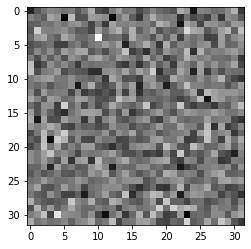

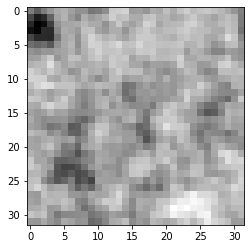

[[1.37654083 2.75062243 3.17333327 ... 2.23527674 1.36850176 1.33253086]
 [2.12417636 2.5109781  2.97068522 ... 1.28623658 1.75301476 1.16445566]
 [1.49447357 2.66184573 2.72661581 ... 1.10919154 1.93258441 1.79517467]
 ...
 [2.90718975 2.23188979 2.37869413 ... 2.74129494 2.34138835 2.49644964]
 [2.60077996 2.861777   3.65893665 ... 3.37684685 1.47078197 1.42233873]
 [2.8856621  3.14446081 3.03598521 ... 2.48606859 2.08386992 2.16814931]]


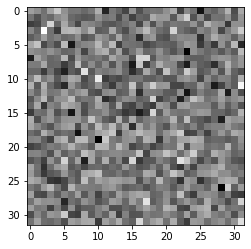

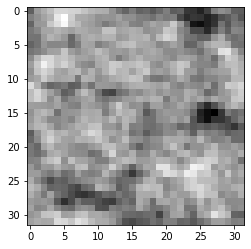

In [43]:
omega = 15
for e in range(0,5):
    A = np.random.normal(mu, sigma, size=(N, N))
    isingplot(A)
    A = wolff(N,t,A,vel,omega,eta)
    print(A)
    isingplot(A)
    

<Figure size 432x288 with 0 Axes>

[[0.88292075 1.06095378 1.03063859 ... 1.15507661 0.9719071  0.92381099]
 [1.1705348  0.8628854  0.94545412 ... 1.12416385 0.93809965 0.98152644]
 [1.16395281 1.10318242 1.00271116 ... 1.11443992 1.23499828 1.15401129]
 ...
 [0.98418578 0.96602551 1.01433326 ... 0.88180672 0.83047569 0.79401504]
 [0.89472741 0.94103643 0.93832608 ... 0.96259825 0.73975472 0.81652282]
 [0.78252162 1.02291878 1.04955481 ... 0.9572133  0.89495279 0.94746261]]


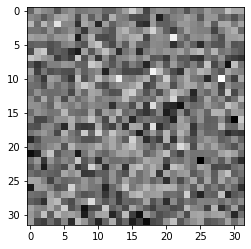

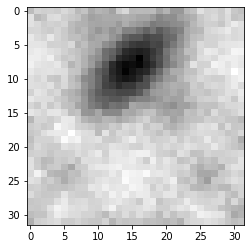

[[-0.88316165 -0.91651791 -0.81686925 ... -0.97095458 -0.85364432
  -1.00761716]
 [-0.75946502 -0.8288799  -0.75079587 ... -0.82808862 -0.73616497
  -0.75788898]
 [-0.63688958 -0.67478875 -0.6086303  ... -0.62822691 -0.66514521
  -0.62107893]
 ...
 [-1.07175137 -1.08660757 -1.23424573 ... -1.18506001 -1.25475725
  -1.19773993]
 [-1.10810552 -1.16368862 -0.96421538 ... -1.17952974 -1.15947584
  -1.04391661]
 [-1.0582049  -1.00304062 -0.92686515 ... -0.94900977 -1.08938225
  -1.07030193]]


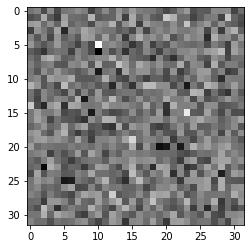

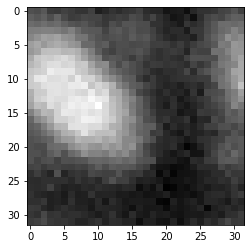

[[0.83755645 0.78721415 0.81863366 ... 0.76715031 0.64525987 0.81152743]
 [0.73904701 0.83772426 0.86219724 ... 0.70118263 0.74008077 0.68510434]
 [0.89632749 0.84051071 0.76347041 ... 0.68637922 0.58418374 0.63328285]
 ...
 [0.61429507 0.63463959 0.71512501 ... 0.67963286 0.68943189 0.73222844]
 [0.78109018 0.74478367 0.72632141 ... 0.71507568 0.7979254  0.56589846]
 [0.76520804 0.83086084 0.62789316 ... 0.65350846 0.58745447 0.70919969]]


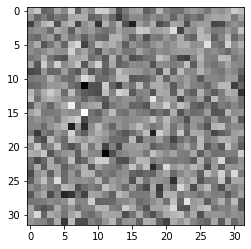

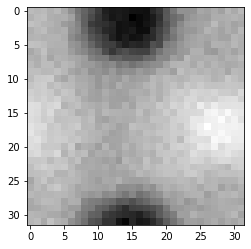

[[0.68709858 0.92867698 0.93950001 ... 0.58461764 0.719752   0.87529181]
 [0.56389188 1.00573128 0.96454557 ... 0.7855835  0.66641833 0.86217642]
 [0.70490542 0.85523592 1.05340043 ... 0.58886821 0.72703787 0.72392604]
 ...
 [0.82526925 0.96760937 1.23964733 ... 0.76797228 0.72465219 0.9126315 ]
 [1.05955162 1.08256336 1.07108134 ... 0.7723402  0.78336127 0.77096596]
 [0.83569307 0.89813293 1.07203736 ... 0.73600841 0.72707944 0.82891951]]


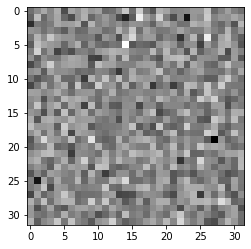

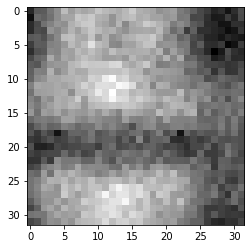

[[0.33540686 0.32637876 0.36934525 ... 0.54638554 0.54942608 0.44558895]
 [0.39752413 0.38150736 0.34426062 ... 0.50565546 0.58433756 0.25327032]
 [0.08547795 0.20660886 0.2261168  ... 0.49805301 0.22738111 0.16597126]
 ...
 [0.53121407 0.45362618 0.51604897 ... 0.62164641 0.77352409 0.62774238]
 [0.51016113 0.60679205 0.50818348 ... 0.64260146 0.61637651 0.46532605]
 [0.46583064 0.46286378 0.41055083 ... 0.69309551 0.55013962 0.56832489]]


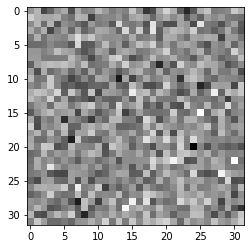

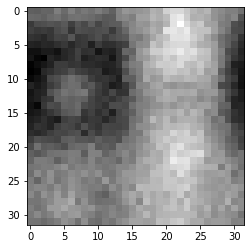

In [44]:
omega = 15
eta = 1
for e in range(0,5):
    A = np.random.normal(mu, sigma, size=(N, N))
    isingplot(A)
    A = wolff(N,t,A,vel,omega,eta)
    print(A)
    isingplot(A)
    

<Figure size 432x288 with 0 Axes>

(12,)
(52,)


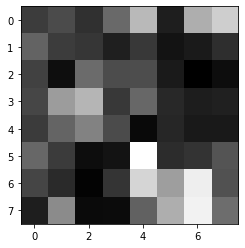

(56,)
(8,)


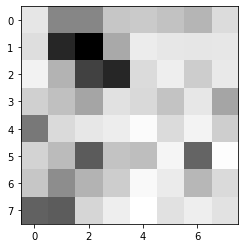

(57,)
(7,)


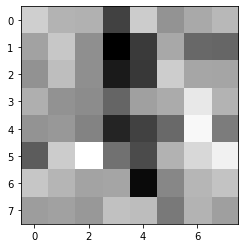

(11,)
(53,)


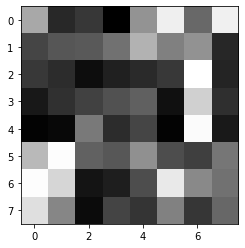

(52,)
(12,)


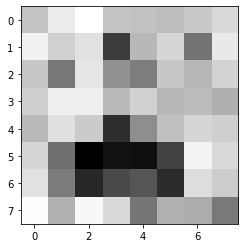

(5,)
(59,)


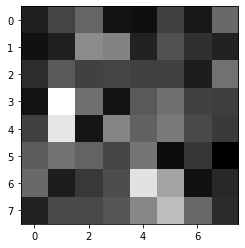

(53,)
(11,)


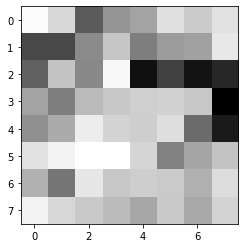

(60,)
(4,)


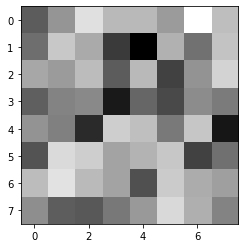

(4,)
(60,)


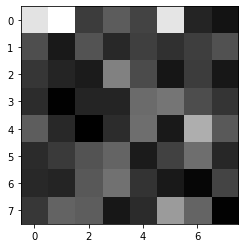

(3,)
(61,)


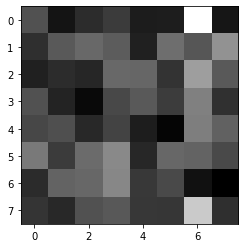

(55,)
(9,)


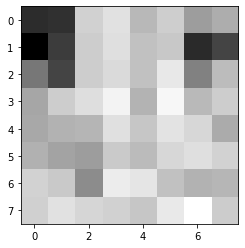

(57,)
(7,)


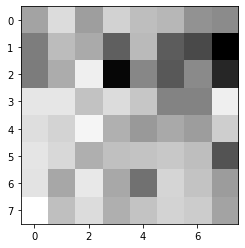

(4,)
(60,)


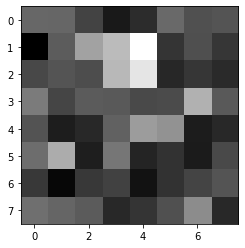

(10,)
(54,)


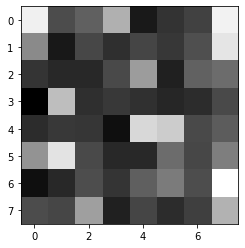

(7,)
(57,)


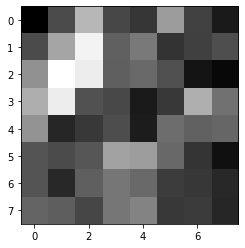

(60,)
(4,)


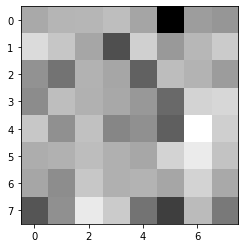

(4,)
(60,)


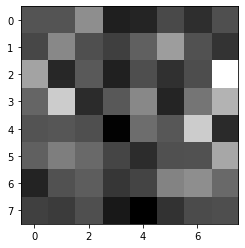

(3,)
(61,)


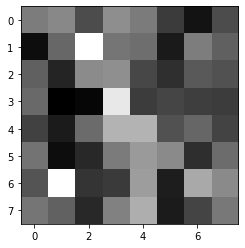

(60,)
(4,)


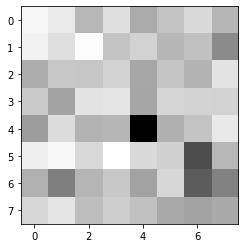

(56,)
(8,)


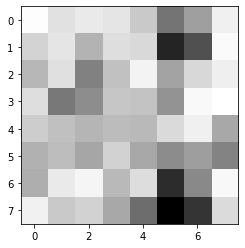

In [41]:
n = 3
N = pow(2,n)
vel = np.zeros((N,N))
for i in range(0,20):
    A = np.random.normal(mu, sigma, size=(N, N))
    A = wolff(N,t,A,vel,omega,eta)
    isingplot(A)
    print(np.shape(A[np.where(A>0)]))
    print(np.shape(A[np.where(A<0)]))